In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ericazhou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('listings.csv.zip')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(48377, 106)

In [4]:
df[['id','neighborhood_overview','neighbourhood']].isnull().sum()

id                           0
neighborhood_overview    16946
neighbourhood               12
dtype: int64

In [5]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,https://www.airbnb.com/rooms/3647,20190912153101,2019-09-13,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,https://www.airbnb.com/rooms/3831,20190912153101,2019-09-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,https://www.airbnb.com/rooms/5022,20190912153101,2019-09-13,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10
3,5099,https://www.airbnb.com/rooms/5099,20190912153101,2019-09-13,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.59
4,5121,https://www.airbnb.com/rooms/5121,20190912153101,2019-09-13,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.39


In [6]:
def clean(text):
  for c in ",.!-/:;()*&[]_~`+=\|'?<>^%$#@•–0123456789":
    text = text.replace(c, " ")
  return text.lower()

In [7]:
neighborhoods = df.neighbourhood.unique()
neighborhoods = [words for segments in neighborhoods for words in str(segments).lower().split()]
print(neighborhoods)

['harlem', 'brooklyn', 'east', 'harlem', 'midtown', 'east', 'bedford-stuyvesant', 'manhattan', 'upper', 'west', 'side', 'lower', 'east', 'side', 'park', 'slope', 'williamsburg', 'chelsea', 'east', 'village', 'hamilton', 'heights', 'bushwick', 'flatbush', 'long', 'island', 'city', 'fort', 'greene', 'kips', 'bay', "hell's", 'kitchen', 'soho', 'red', 'hook', 'midtown', 'alphabet', 'city', 'clinton', 'hill', 'queens', 'woodside', 'meatpacking', 'district', 'brooklyn', 'heights', 'carroll', 'gardens', 'gowanus', 'lefferts', 'garden', 'greenpoint', 'boerum', 'hill', 'kew', 'garden', 'hills', 'west', 'village', 'upper', 'east', 'side', 'sunnyside', 'dumbo', 'st.', 'george', 'highbridge', 'ridgewood', 'prospect', 'heights', 'jamaica', 'cobble', 'hill', 'flatiron', 'district', 'roosevelt', 'island', 'staten', 'island', 'west', 'brighton', 'the', 'bronx', 'eastchester', 'crown', 'heights', 'chinatown', 'inwood', 'washington', 'heights', 'the', 'rockaways', 'astoria', 'murray', 'hill', 'morningsi

In [8]:
sw = stopwords.words("english")
sw.extend(['restaurants','bars','new','york','city','nyc','neighborhoods','neighborhood','one','walk',
           'away','blocks','block','area','walking','apartment','around','minutes','public','many','streets',
           'right','best','distance','located','also','building','close','within','minute','avenue','bed',
           'stuy', 'mi', 'hell', 'train', 'subway', 'etc', 'grand', 'central', 'take', 'ave',
          'th', 'location', 'st', 'airbnb', 'far', 'min', 'mins', 'everything', 'get', 'q', 'like',
          'lots', 'nearby', 'find', 'it’s', 'l', 'place', 'lined', 'bus', 'airport', 'jfk', 'two',
          'ny', 'high', 'miles', 'line'])
sw.extend(neighborhoods)
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
nbs = df.neighbourhood.unique()
nb_maps = {}
for nb in nbs:
  words = df[df['neighbourhood']==nb].dropna(subset=['neighborhood_overview'])
  if len(words) < 150 or nb in ['Brooklyn','The Bronx','Manhattan','Queens','Staten Island']:
    continue
  words_str = clean(words.neighborhood_overview.str.cat(sep=' '))
  words_top = pd.DataFrame(Counter(words_str.split()).most_common(), columns=['word','freq'])
  words_cleaned = words_top[~words_top.word.isin(sw)]
  words_cleaned['freq_norm'] = words_cleaned.freq/len(words)
  print(nb,words_cleaned.word[:10].tolist())
  nb_maps[nb] = words_cleaned

Harlem ['food', 'apollo', 'safe', 'historic', 'coffee', 'corner', 'famous', 'shops', 'theater', 'stores']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


East Harlem ['food', 'museum', 'safe', 'culture', 'spanish', 'diverse', 'shopping', 'museums', 'shops', 'stores']
Midtown East ['united', 'nations', 'station', 'empire', 'state', 'shopping', 'broadway', 'home', 'rockefeller', 'river']
Bedford-Stuyvesant ['shops', 'coffee', 'stuyvesant', 'historic', 'cafes', 'brownstones', 'beautiful', 'stores', 'community', 'well']
Upper West Side ['riverside', 'museum', 'lincoln', 'history', 'natural', 'stores', 'shopping', 'quiet', 'columbus', 'shops']
Lower East Side ['galleries', 'shops', 'art', 'les', 'bridge', 'museum', 'shopping', 'coffee', 'river', 'food']
Park Slope ['shops', 'museum', 'beautiful', 'friendly', 'music', 'shopping', 'family', 'botanical', 'coffee', 'well']
Williamsburg ['shops', 'coffee', 'music', 'food', 'cafes', 'art', 'amazing', 'stores', 'shopping', 'mccarren']
Chelsea ['art', 'galleries', 'market', 'madison', 'highline', 'shops', 'hotel', 'station', 'nightlife', 'shopping']
East Village ['shops', 'cafes', 'coffee', 'nightli

In [10]:
def get_freq(word):
  test = pd.DataFrame(columns=['neighborhood','freq','word'])
  for key in nb_maps.keys():
    words = nb_maps[key]
    if len(words.loc[words['word']==word]['freq_norm'])>0:
      test = test.append({'word':word,'neighborhood':key,'freq':words.loc[words['word']==word]['freq_norm'].item()},ignore_index=True)
  return test.sort_values(by='freq',ascending=False)

In [11]:
all_nbs = list(nb_maps.keys())
clrs = sns.color_palette('hls', n_colors=len(all_nbs)) 
colors = {}
for i in range(len(all_nbs)):
  colors[all_nbs[i]] = clrs[i]

**OPTION 1** Top 10 neighborhoods by word: color coded

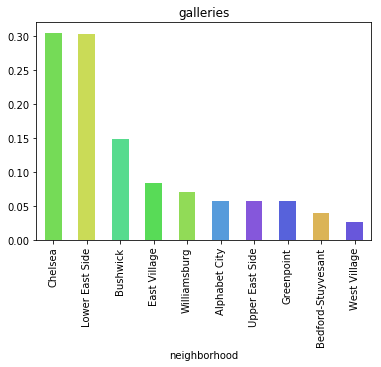

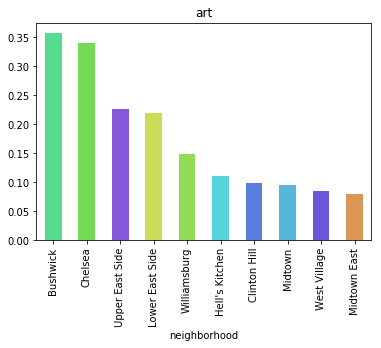

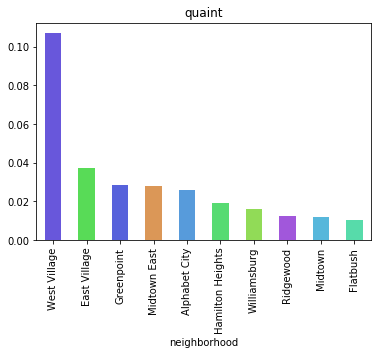

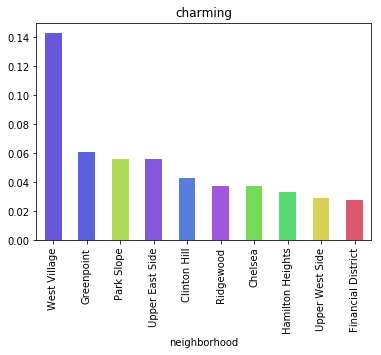

In [12]:
words = ['galleries','art','quaint','charming']
all_words = pd.DataFrame(columns=['neighborhood','freq','word'])
for word in words:
  freqs = get_freq(word)[:10]
  freqs.plot(x='neighborhood',y='freq',title=word,kind='bar',legend=False,
             color=freqs['neighborhood'].apply(lambda x: colors[x]))
  plt.savefig('images/barchart_'+word+'.png',bbox_inches = "tight")
  all_words = all_words.append(freqs)

**OPTION 2**
Plot all neighborhoods by default - look @ common areas to figure out what's similar

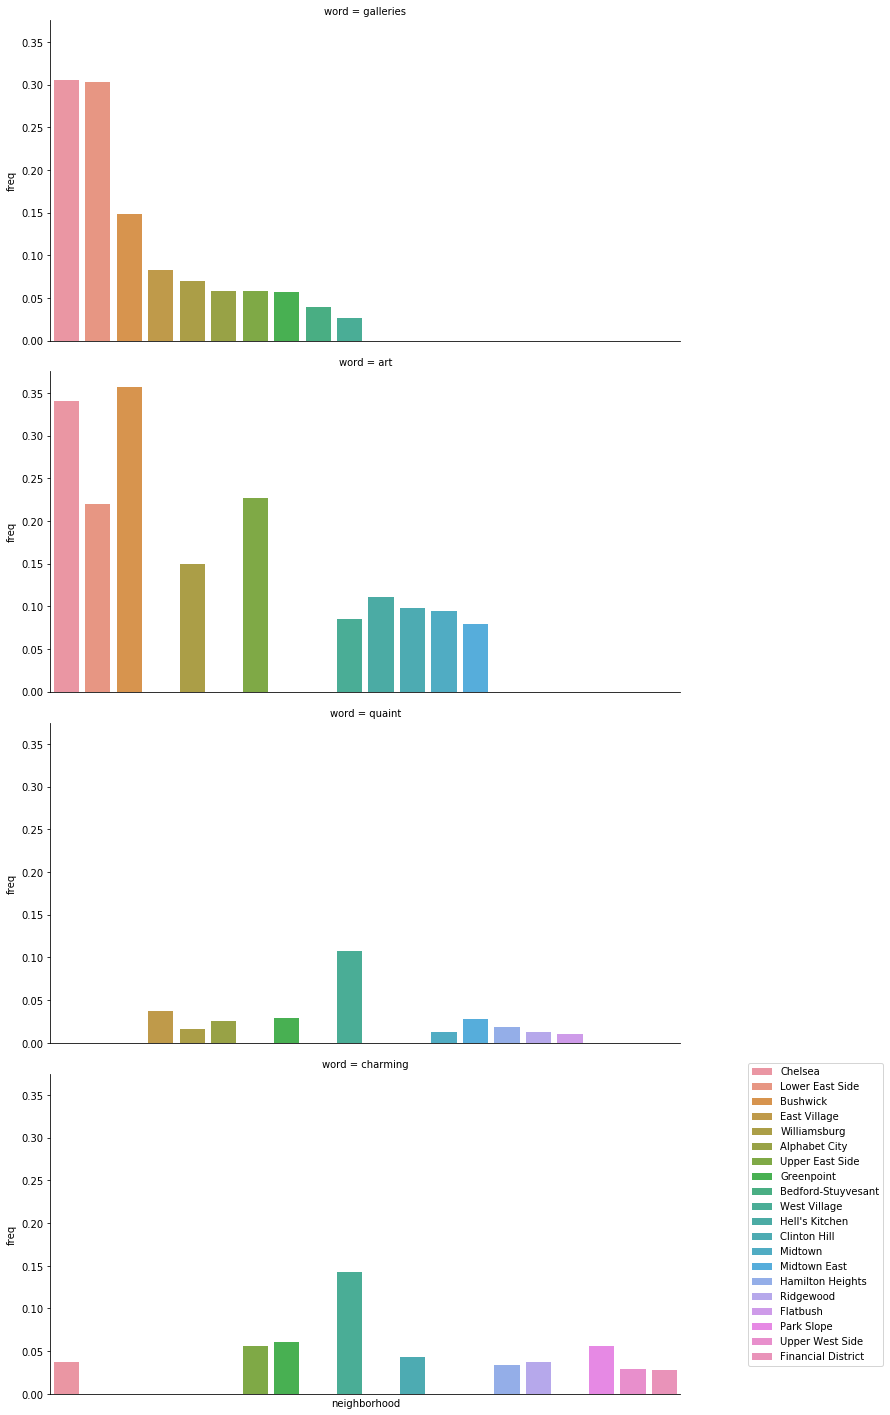

In [13]:
g = sns.catplot(x="neighborhood", y="freq", hue="neighborhood", row="word",data=all_words, 
                kind="bar",aspect=2,dodge=False,legend_out=True);
lgd = plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks([])
plt.savefig('images/all_neighborhoods.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

**OPTION 3** Wordcloud of words for each neighborhood

In [14]:
df = df[['id','neighborhood_overview','neighbourhood']]
wburg = df[df['neighbourhood']=='Williamsburg'].dropna(subset=['neighborhood_overview'])
wburg_words = clean(wburg.neighborhood_overview.str.cat(sep=' '))
wburg_words

'bushwick is a constantly changing area   new openings all the time    new local cinema and bar resto  new indi food market arriving  many new restaurants throughout the neighborhood  juice bar cafes  fine and raw factory chocolate shop  williamsburg is the trendiest neighborhood currently  if you are looking for super easy access to both hip brooklyn and manhattan  this is it  williamsburg is one of the best places to be n brooklyn  super cool vibe  amazing shops and restaurant just    to    min on the train to manhattan   some days you don t even have to leave the neighborhood  it is a great place to hangout  nestled in historic south williamsburg in a quiet and breezy area a stone s throw away from the east river and great views of manhattan  bedford ave strip  williamsburg bridge  domino park are just a few blocks away  along with great restaurants  bars  cafès  organic groceries  the apartment is located on s  rd   bedford avenue   which is the beginning of the popular bedford ave

In [15]:
wburg_top = pd.DataFrame(Counter(wburg_words.split()).most_common(), columns=['word','freq'])
wburg_top.head()

,word,freq
0,the,3353
1,and,2853
2,of,1646
3,a,1629
4,to,1522


In [16]:
def drawCloud(logo,wordcloud_view,text):
  # contour_width=1, contour_color='steelblue'
  stop_words = set(stopwords.words('english'))
  wordcloud = WordCloud(max_font_size=80, random_state=42, mask=logo, contour_width=1, stopwords=stop_words, prefer_horizontal=0.7, background_color='white').generate(text)
  image_colors = ImageColorGenerator(logo)
  wordcloud_view.set_data(wordcloud.recolor(color_func=image_colors))
  plt.pause(0.0001)

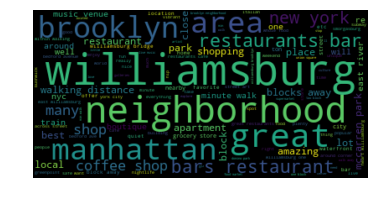

In [17]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(wburg_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('images/wordcloud.png')